In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from functions import criar_Perceptron,criar_MLP,dividir_dados
import os
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

2025-01-27 13:54:47.015235: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-27 13:54:47.031626: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-27 13:54:47.036232: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-27 13:54:47.047376: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dados = pd.read_csv("dados/dados_imperfeito_poisson.csv")
del dados['Unnamed: 0']
dados

,comprimento de onda,cor
0,460.00,azul
1,460.65,azul
2,461.31,azul
3,461.96,azul
4,462.61,azul
...,...,...
195,587.39,verde
196,588.04,verde
197,588.69,verde
198,589.35,verde


In [3]:
# Cria a camada de normalização
normalization_layer = keras.layers.Normalization(axis=-1)

# Adapta a camada aos dados (necessário para calcular a média e o desvio padrão)
normalization_layer.adapt(dados['comprimento de onda'].values.reshape(-1, 1))

2025-01-27 13:54:49.569427: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
encoder = OneHotEncoder()
cor_encoded = encoder.fit_transform(dados['cor'].values.reshape(-1,1))
cor_encoded.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [5]:
dados['cor encoded'] = cor_encoded.toarray()[:,0].copy()
dados

,comprimento de onda,cor,cor encoded
0,460.00,azul,1.0
1,460.65,azul,1.0
2,461.31,azul,1.0
3,461.96,azul,1.0
4,462.61,azul,1.0
...,...,...,...
195,587.39,verde,0.0
196,588.04,verde,0.0
197,588.69,verde,0.0
198,589.35,verde,0.0


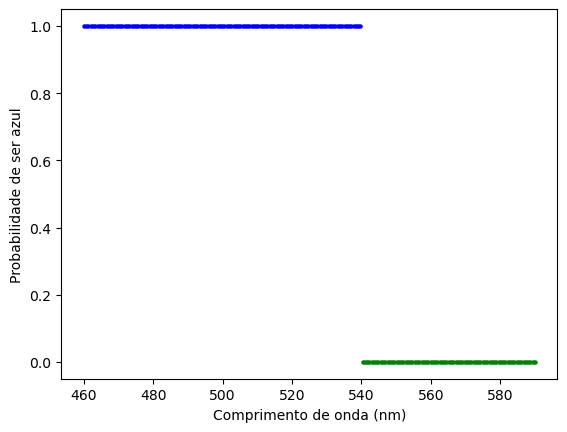

In [6]:
azul = dados[dados['cor']=='azul']
verde = dados[dados['cor']=='verde']

plt.scatter(azul['comprimento de onda'],azul['cor encoded'],color='blue',s=5)
plt.scatter(verde['comprimento de onda'],verde['cor encoded'],color='green',s=5)
plt.ylabel('Probabilidade de ser azul')
plt.xlabel('Comprimento de onda (nm)')
plt.savefig('imagens/conjunto de dados com ruído poisson.png')

In [7]:
dados

,comprimento de onda,cor,cor encoded
0,460.00,azul,1.0
1,460.65,azul,1.0
2,461.31,azul,1.0
3,461.96,azul,1.0
4,462.61,azul,1.0
...,...,...,...
195,587.39,verde,0.0
196,588.04,verde,0.0
197,588.69,verde,0.0
198,589.35,verde,0.0


In [8]:
x_train,y_train,x_test,y_test,strat_train_set,strat_test_set = dividir_dados(dados)

In [9]:
learning_rate_exponent = 3

path_perceptron = f'modelos/perceptron_poisson_{learning_rate_exponent}.keras'
path_mlp = f'modelos/MLP_poisson_{learning_rate_exponent}.keras'

if not os.path.exists(path_mlp):
    MLP = criar_MLP(x_train, strat_train_set, 1 / 10**learning_rate_exponent)
    MLP.save(path_mlp)
else:
    MLP = keras.models.load_model(path_mlp)
if not os.path.exists(path_perceptron):
    Perceptron = criar_Perceptron(x_train,strat_train_set,learning_rate=1/10**learning_rate_exponent)
    Perceptron.save(path_perceptron)
else:
    Perceptron = keras.models.load_model(path_perceptron)

In [10]:
MLP.fit(x_train,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9366 - loss: 0.6654  
Epoch 2/100


I0000 00:00:1737996890.369452   13816 service.cc:146] XLA service 0x733bd00089f0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737996890.369478   13816 service.cc:154]   StreamExecutor device (0): Host, Default Version
2025-01-27 13:54:50.382936: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737996890.527460   13816 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9444 - loss: 0.6566 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9361 - loss: 0.6502 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9357 - loss: 0.6420 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9503 - loss: 0.6347 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9659 - loss: 0.6268 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9628 - loss: 0.6198 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9633 - loss: 0.6152 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9416 - loss: 0.6153 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9598 - loss: 0.6045 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9446 - loss: 0.5942 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9498 - loss: 0.5912 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9580 - loss: 0.5872 


In [11]:
Perceptron.fit(x_train,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0727 - loss: 1.3004  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0706 - loss: 1.2965 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0793 - loss: 1.2729 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0749 - loss: 1.2793 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0658 - loss: 1.2735 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0736 - loss: 1.2766 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0810 - loss: 1.2462 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0771 - loss: 1.2978 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0515 - loss: 1.2633 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0788 - loss: 1.2406 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0675 - loss: 1.2356 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0771 - lo

In [12]:
np.argmax(Perceptron.predict(x_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

In [13]:
resultado = np.argmax(y_test,axis=1)
predito = np.argmax(MLP.predict(x_test),axis=1)


# Calcula a acurácia diretamente
accuracy = np.mean(resultado == predito)
print(f"Acurácia com mlp: {accuracy}")

predito = np.argmax(Perceptron.predict(x_test),axis=1)

accuracy = np.mean(resultado==predito)

print(f'Acurácia do Perceptron: {accuracy}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Acurácia com mlp: 0.975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Acurácia do Perceptron: 0.2


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


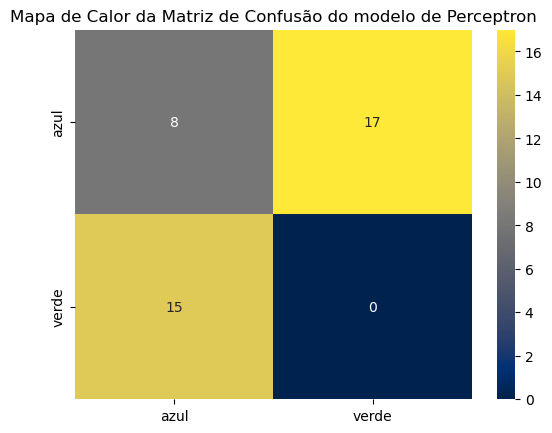

In [14]:
labels = ('azul','verde')
predito = np.argmax(Perceptron.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de Perceptron"
plt.title(title)
plt.savefig(f'imagens/{title}_poisson.png')

In [15]:
predito = np.argmax(MLP.predict(x_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


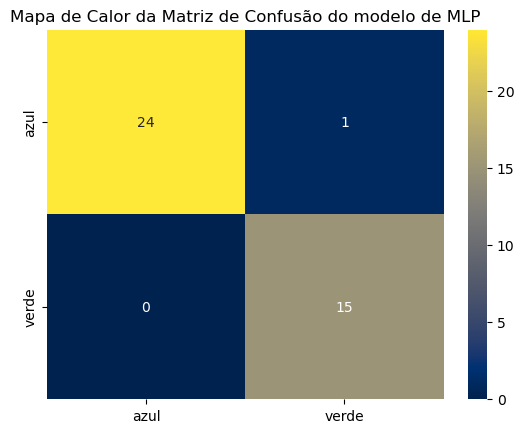

In [16]:
labels = ('azul','verde')
predito = np.argmax(MLP.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de MLP"
plt.title(title)
plt.savefig(f'imagens/{title}_poisson.png')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


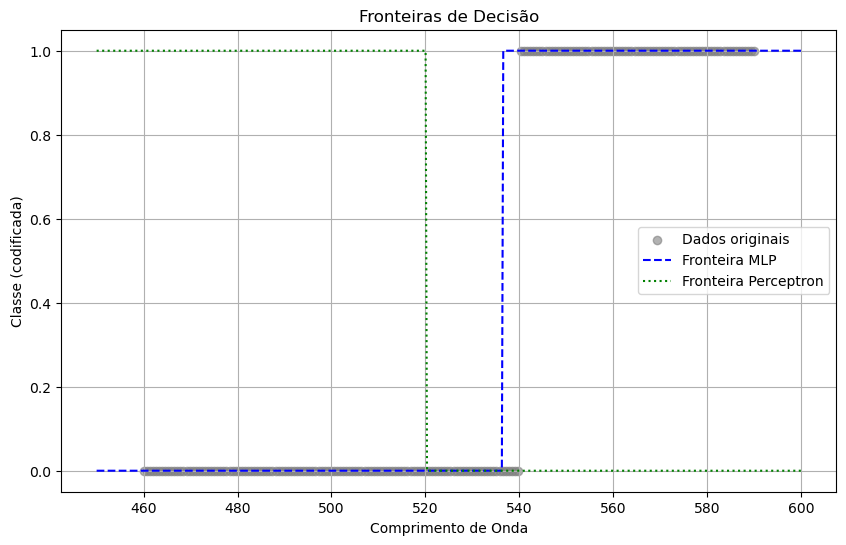

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Gera uma malha de pontos
x_min, x_max = dados['comprimento de onda'].min() - 10, dados['comprimento de onda'].max() + 10
xx = np.linspace(x_min, x_max, 500).reshape(-1, 1)

# Predição para os modelos
mlp_pred = np.argmax(MLP.predict(xx), axis=1)
perceptron_pred = np.argmax(Perceptron.predict(xx), axis=1)

# Converte as classes para rótulos
encoder = LabelEncoder()
encoder.fit(['azul', 'verde'])

# Plota as fronteiras de decisão
plt.figure(figsize=(10, 6))
plt.scatter(dados['comprimento de onda'], encoder.transform(dados['cor']), c='gray', label='Dados originais', alpha=0.6)
plt.plot(xx, mlp_pred, label="Fronteira MLP", color="blue", linestyle="--")
plt.plot(xx, perceptron_pred, label="Fronteira Perceptron", color="green", linestyle=":")
plt.title("Fronteiras de Decisão")
plt.xlabel("Comprimento de Onda")
plt.ylabel("Classe (codificada)")
plt.legend()
plt.grid(True)
plt.savefig("imagens/fronteiras_decisao.png")
plt.show()


In [51]:
MLP_sigmoid = criar_MLP(x_train,strat_train_set,3e-3,activaction='relu')
MLP_sigmoid.fit(x_train,y_train,epochs=100)

SyntaxError: invalid syntax (3914199569.py, line 1)

In [ ]:
resultado = np.argmax(y_test,axis=1)
predito = np.argmax(MLP_sigmoid.predict(x_test),axis=1)


# Calcula a acurácia diretamente
accuracy = np.mean(resultado == predito)
print(f"Acurácia com mlp: {accuracy}")

predito = np.argmax(Perceptron.predict(x_test),axis=1)

accuracy = np.mean(resultado==predito)

print(f'Acurácia do Perceptron: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Acurácia com mlp: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Acurácia do Perceptron: 0.2


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


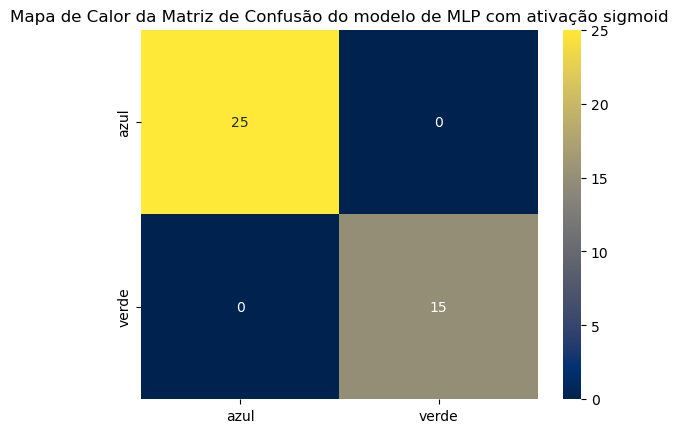

In [ ]:
labels = ('azul','verde')
predito = np.argmax(MLP_sigmoid.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de MLP com ativação sigmoid"
plt.title(title)
plt.savefig(f'imagens/{title}_poisson.png')